In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

# Read the training and test data set

In [7]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
print(train.head())
print('\n Test Data')
print(test.head())
type(train.Datetime[0])

   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2

 Test Data
      ID          Datetime
0  18288  26-09-2014 00:00
1  18289  26-09-2014 01:00
2  18290  26-09-2014 02:00
3  18291  26-09-2014 03:00
4  18292  26-09-2014 04:00


str

## Convert to datetime format

In [8]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
type(train.Datetime[0])

pandas._libs.tslib.Timestamp

In [9]:
train['hour'] = train.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,hour
0,0,2012-08-25 00:00:00,8,0
1,1,2012-08-25 01:00:00,2,1
2,2,2012-08-25 02:00:00,6,2
3,3,2012-08-25 03:00:00,2,3
4,4,2012-08-25 04:00:00,2,4


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

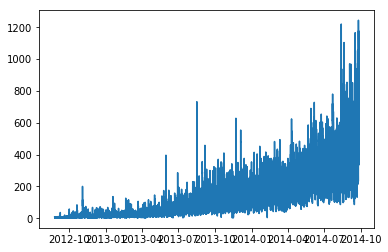

In [16]:
plt.plot(train.Datetime, train.Count)

In [39]:
# Calculate average hourly fraction
hourly_frac = train.groupby(['hour']).mean() / np.sum(train.groupby(['hour']).mean())
hourly_frac.drop(['ID'], axis=1, inplace=True)
hourly_frac.columns = ['fraction']

In [40]:
# Converting to timeseries from datetime
train.index = train.Datetime
train.drop(['ID', 'hour', 'Datetime'], axis=1, inplace=True)

In [42]:
daily_train = train.resample('D').sum()
daily_train.head()

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


## Prophet requires the variable name in the time series to be:
1. y - Target
2. ds - Datetime

In [43]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


## Fitting the prophet model

In [46]:
m = Prophet(daily_seasonality=True, seasonality_prior_scale=0.1)
m.fit(daily_train)

In [47]:
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

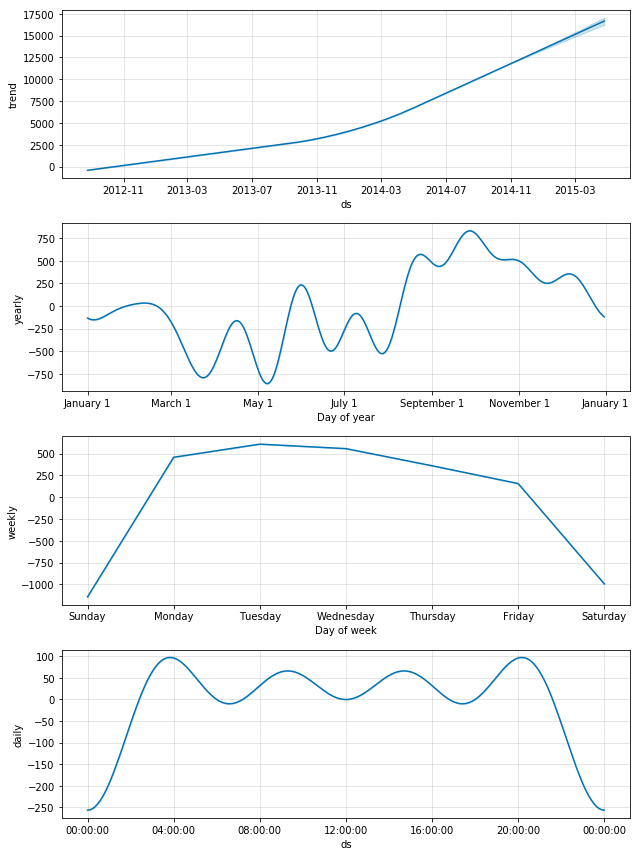

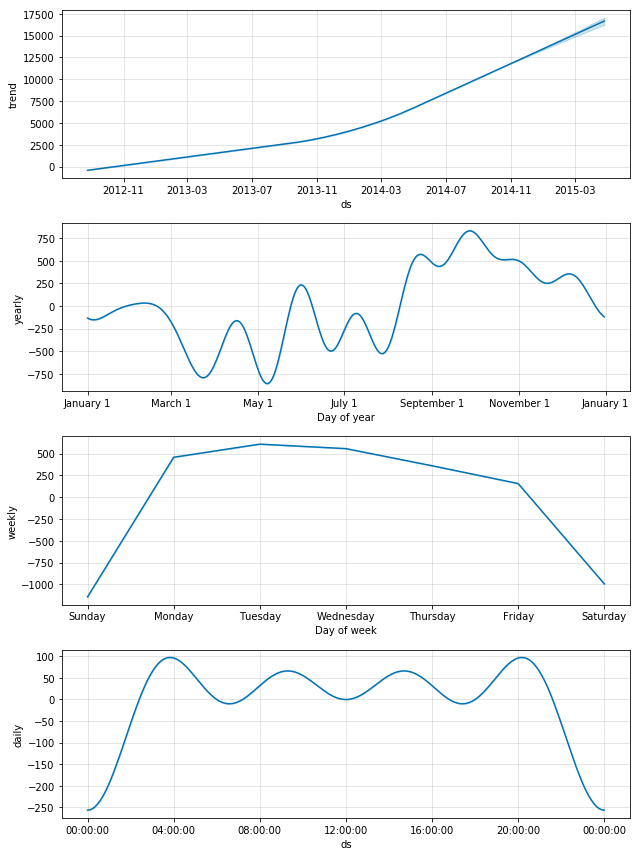

In [48]:
m.plot_components(forecast)